In [2]:
import pandas as pd


df = pd.read_csv('final_data/HA_ALL_phi4.csv')
df

,paper_id,reviewer,llm_Comprehensiveness,llm_Vagueness,llm_Objectivity,llm_Fairness,llm_Actionability,llm_Constructiveness,llm_Relevance Alignment,llm_Clarity and Readability,llm_Usage of Technical Terms,llm_Factuality,llm_Overall Quality,llm_Sentiment Polarity,llm_Politeness
0,123,Reviewer_EGJf,3,low,3,3,2,3,4,4,4,partially factual,65,neutral,polite
1,123,Reviewer_DWom,3,low,3,3,2,4,5,4,4,partially factual,75,neutral,polite
2,123,Reviewer_PnHf,4,low,4,4,3,4,5,4,4,factual,88,positive,polite
3,123,Reviewer_ekPo,4,low,4,4,3,4,5,4,3,factual,85,positive,polite
4,0,Reviewer_HFRa,3,low,4,3,4,4,5,4,4,partially factual,78,neutral,polite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,118,Anonymous,4,low,4,4,3,3,5,4,5,factual,75,negative,neutral
647,61,Natasha Noy,1,high,2,3,1,1,4,3,0,factual,30,positive,polite
648,76,Anonymous,3,low,3,3,2,2,4,4,4,partially factual,60,negative,neutral
649,76,Ghislain Hachey,3,low,3,3,4,4,4,3,4,partially factual,70,neutral,polite


In [3]:
# plot correlation map for columns starting with 'llm'
df.columns

Index(['paper_id', 'reviewer', 'llm_Comprehensiveness', 'llm_Vagueness',
       'llm_Objectivity', 'llm_Fairness', 'llm_Actionability',
       'llm_Constructiveness', 'llm_Relevance Alignment',
       'llm_Clarity and Readability', 'llm_Usage of Technical Terms',
       'llm_Factuality', 'llm_Overall Quality', 'llm_Sentiment Polarity',
       'llm_Politeness'],
      dtype='object')

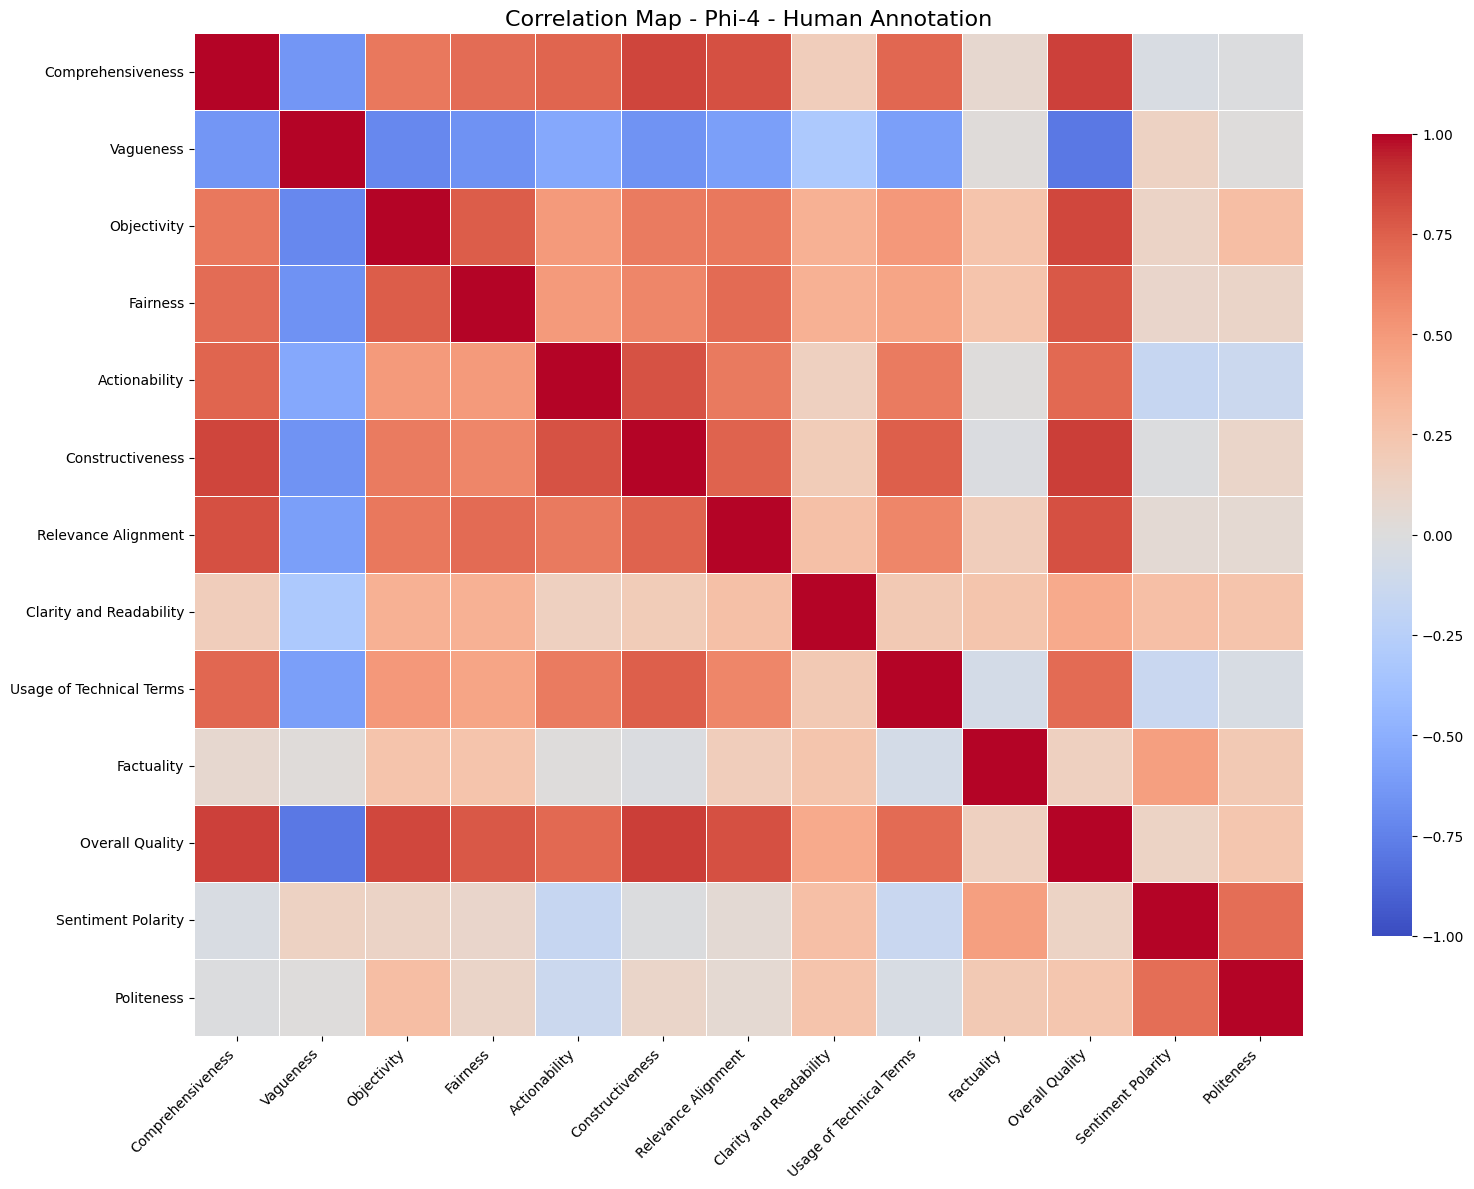

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter and clean the data
llm_columns = [col for col in df.columns if col.startswith('llm_')]
df_llm = df[llm_columns].dropna()
# df_llm = df_llm.drop(['llm_overall_score_100'], axis=1)

# 2. Define validation rules and categorical mappings
validation_rules = {
    'Comprehensiveness': {'type': 'int', 'range': (0, 5)},
    'Usage of Technical Terms': {'type': 'int', 'range': (0, 5)},
    'Factuality': {'type': 'categorical', 'values': ['factual', 'partially factual', 'unfactual']},
    'Sentiment Polarity': {'type': 'categorical', 'values': ['negative', 'neutral', 'positive']},
    'Politeness': {'type': 'categorical', 'values': ['polite', 'neutral', 'impolite']},
    'Vagueness': {'type': 'categorical', 'values': ['none', 'low', 'moderate', 'high', 'extreme']},
    'Objectivity': {'type': 'int', 'range': (0, 5)},
    'Fairness': {'type': 'int', 'range': (0, 5)},
    'Actionability': {'type': 'int', 'range': (0, 5)},
    'Constructiveness': {'type': 'int', 'range': (0, 5)},
    'Relevance Alignment': {'type': 'int', 'range': (0, 5)},
    'Clarity and Readability': {'type': 'int', 'range': (0, 5)},
    'Overall Quality': {'type': 'int', 'range': (0, 100)}
}

categorical_mappings = {
    'Factuality': {'unfactual': 0, 'partially factual': 1, 'factual': 2},
    'Sentiment Polarity': {'negative': 0, 'neutral': 1, 'positive': 2},
    'Politeness': {'impolite': 0, 'neutral': 1, 'polite': 2},
    'Vagueness': {'none': 0, 'low': 1, 'moderate': 2, 'high': 3, 'extreme': 4}
}

# Modified step 3: Clean and validate data with type conversion
for col in df_llm.columns:
    base_name = col.replace('llm_', '')
    rule = validation_rules[base_name]
    
    if rule['type'] == 'int':
        # Convert to numeric first (handle strings like '3' -> 3)
        df_llm[col] = pd.to_numeric(df_llm[col], errors='coerce')
        min_val, max_val = rule['range']
        valid_mask = df_llm[col].between(min_val, max_val)
    else:
        valid_mask = df_llm[col].isin(rule['values'])
    
    df_llm = df_llm[valid_mask]

# 4. Encode categorical features
for col, mapping in categorical_mappings.items():
    full_col = f'llm_{col}'
    df_llm[full_col] = df_llm[full_col].map(mapping)

# 5. Prepare correlation matrix
df_llm.columns = [col.replace('llm_', '') for col in df_llm.columns]
corr_matrix = df_llm.corr()

# 6. Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=False, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            annot_kws={'size': 8},
            vmax=1,
            vmin=-1,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Map - Phi-4 - Human Annotation', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()